## Experiments: Sensitive Analysis Hyperparameter RSAST:


It is runned RSAST in a set of UCR datasets with a predefined number of runs ("runs"). Then, it is selected a range ("range_total") between 1, 10, 30 ,50 and 100 for the selected dataset.

In [59]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['c:\\Users\\Public\\random_sast\\ExperimentationRSAST',
 'c:\\ProgramData\\Anaconda3\\python39.zip',
 'c:\\ProgramData\\Anaconda3\\DLLs',
 'c:\\ProgramData\\Anaconda3\\lib',
 'c:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Nicolas R\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Nicolas R\\.ipython',
 'c:\\Users\\Public\\random_sast/sast',
 'c:\\Users\\Public\\random_sast\\sast',
 'c:\\Users\\Public\\random_sast\\ExperimentationRSAST/sast',
 'c:\\Users\\Public\\random_sast\\ExperimentationRSAST\\sast',
 'c:\\Users\\Public\\random_sast\\cd_diagram',
 'c:\\Users\\Public\\random_sast/cd_diagram',
 'c:\\Users\\Public\\random_sast\\ExperimentationRSAST\\cd_diagram',
 'c:

In [60]:
from sast import *
import pandas as pd
import researchpy
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Datasets

In [61]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]


In [62]:
df_other_methods['method'].unique()

array(['BOSS', 'Catch22', 'cBOSS', 'HIVE-COTEv1', 'InceptionTime',
       'ProximityForest', 'ResNet', 'RISE', 'ROCKET', 'S-BOSS', 'SAST',
       'STC', 'TS-CHIEF', 'TSF', 'WEASEL'], dtype=object)

In [63]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')


# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)


C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_14204\371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_14204\371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_14204\371163348.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_14204\371163348.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.repl

In [64]:
#create dataset to generate cd diagram
df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
#df_perf.classifier_name.unique()

In [65]:
#filter dataset for cd-diagrams with the ds that has already tested all combinations of params
param_per_ds=pd.pivot_table(df_perf, index=['dataset_name'],values=['classifier_name'] ,aggfunc='count')
param_per_ds=param_per_ds.reset_index()
complete_ds=param_per_ds[param_per_ds.classifier_name==max(param_per_ds.classifier_name)]["dataset_name"].unique()

complete_ds=complete_ds.tolist()

#complete_ds.remove('DistalPhalanxOutlineCorrect')

#df_perf=df_perf[df_perf.dataset_name.isin(complete_ds)]
#df_result=df_result[df_result.dataset_name.isin(complete_ds)]


In [66]:
#get ds tested overall
df_result['dataset_name'].unique()

array(['Chinatown', 'Coffee', 'DistalPhalanxOutlineAgeGroup',
       'DistalPhalanxOutlineCorrect', 'Fungi', 'GunPoint',
       'ItalyPowerDemand', 'ShapeletSim', 'SmoothSubspace',
       'SonyAIBORobotSurface2', 'SyntheticControl'], dtype=object)

In [67]:
#get columns of generated datasets
df_result.columns.unique()

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [68]:
#get ds tested overall
df_perf['dataset_name'].unique()

array(['Chinatown', 'Coffee', 'DistalPhalanxOutlineAgeGroup',
       'DistalPhalanxOutlineCorrect', 'Fungi', 'GunPoint',
       'ItalyPowerDemand', 'ShapeletSim', 'SmoothSubspace',
       'SonyAIBORobotSurface2', 'SyntheticControl'], dtype=object)

In [69]:
#get columns of generated datasets
df_perf.columns.unique()

Index(['classifier_name', 'dataset_name', 'accuracy'], dtype='object')

### Hyperparameter Tunning RSAST 

#### Accuracy: Subsequence Lenght Method 

In [75]:
filter_param=df_result[df_result.dataset_name=='Fungi']

filter_param=filter_param[filter_param.len_method=='ACF&PACF']
filter_param.dataset_name.unique()

array(['Fungi'], dtype=object)

In [71]:
filter_param.rpoint.unique()

array(['half_len', '1', '10', '30', '50', '100', '1000', '10000'],
      dtype=object)

In [72]:


filter_param=df_result[df_result.rpoint=='10000']

In [73]:
filter_param.nb_per_class.unique()

array(['1', '10', '30', '50', '100', 'half_instance'], dtype=object)

In [74]:
filter_param=filter_param[filter_param.nb_per_class=='1']

In [77]:
# create a pivot table with the mean of score by dataset
len_method_vs_ds=pd.pivot_table(filter_param, values='accuracy', index=['len_method' ],columns=['dataset_name',"classifier_name"], aggfunc='mean')
len_method_vs_ds=np.transpose(len_method_vs_ds)#[['ACF','PACF']]
len_method_vs_ds=len_method_vs_ds.reset_index()
df_rocket=df_other_methods[df_other_methods["method"]=="ROCKET"]
merged_df = len_method_vs_ds.merge(df_rocket,left_on='dataset_name', right_on='dataset',  how='left')
merged_df=merged_df.drop('dataset',axis=1)
len_method_vs_ds.to_excel('results_fungi.xlsx')


In [18]:

# Summary statistics for a Series (single variable)
researchpy.summary_cont(filter_param.groupby(['len_method'])['accuracy'], conf = 0.95)

,N,Mean,SD,SE,95% Conf.,Interval
len_method,,,,,,
ACF&PACF,12,0.8962,0.0753,0.0217,0.8484,0.9441


In [19]:
stats = filter_param.groupby(['len_method'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats.head(10))

                mean  count     std   ci95_hi   ci95_lo
len_method                                             
ACF&PACF    0.896239     12  0.0753  0.938844  0.853634


#### Generate Boxplot Tunning Hyperparameter

In [20]:
df_result.nb_per_class.unique()

array(['half_instance', '1', '10', '30', '50', '100', '1000', '10000'],
      dtype=object)

In [21]:
df_result.len_method.unique()

array(['ACF&PACF', 'ACF', 'PACF', 'Max ACF', 'Max PACF', 'None'],
      dtype=object)

rpoint         1        10        30        50       100      1000     10000  \
count   4.000000  4.000000  4.000000  4.000000  4.000000  4.000000  4.000000   
mean    0.914126  0.933687  0.944359  0.937304  0.945919  0.940586  0.943848   
std     0.036624  0.047723  0.036064  0.046935  0.040274  0.045556  0.043387   
min     0.885624  0.887373  0.913256  0.881427  0.903113  0.900665  0.899965   
25%     0.891231  0.895177  0.913314  0.907023  0.915778  0.901833  0.909991   
50%     0.902106  0.934798  0.942089  0.945556  0.950000  0.937506  0.945491   
75%     0.925000  0.973307  0.973134  0.975836  0.980141  0.976259  0.979347   
max     0.966667  0.977778  0.980000  0.976676  0.980564  0.986667  0.984444   

rpoint  half_len  
count   4.000000  
mean    0.939542  
std     0.039972  
min     0.899685  
25%     0.907921  
50%     0.941242  
75%     0.972863  
max     0.976000  
rpoint         1        10        30        50       100  1000  10000  \
count   4.000000  4.000000  4.00000

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_14204\10919453.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


rpoint         1        10        30        50       100  1000  10000  \
count   4.000000  4.000000  4.000000  4.000000  4.000000   0.0    0.0   
mean    0.918424  0.941063  0.946456  0.946981  0.948560   NaN    NaN   
std     0.058714  0.039181  0.038948  0.039609  0.036602   NaN    NaN   
min     0.866037  0.905911  0.912207  0.911111  0.913956   NaN    NaN   
25%     0.869843  0.908144  0.913052  0.913507  0.918489   NaN    NaN   
50%     0.912718  0.938889  0.945556  0.947153  0.948889   NaN    NaN   
75%     0.961299  0.971808  0.978960  0.980627  0.978960   NaN    NaN   
max     0.982222  0.980564  0.982507  0.982507  0.982507   NaN    NaN   

rpoint  half_len  
count   4.000000  
mean    0.948659  
std     0.038394  
min     0.911158  
25%     0.917789  
50%     0.950000  
75%     0.980870  
max     0.983479  
rpoint         1        10        30        50       100  1000  10000  \
count   4.000000  4.000000  4.000000  4.000000  4.000000   0.0    0.0   
mean    0.828369  0.87190

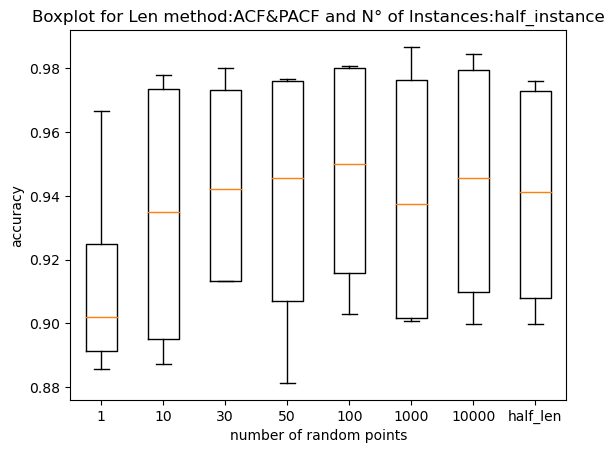

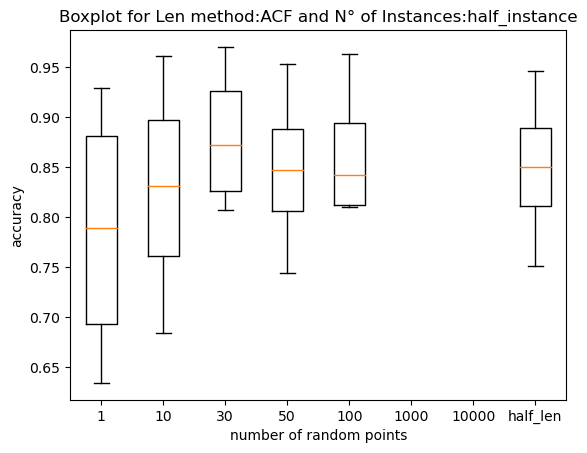

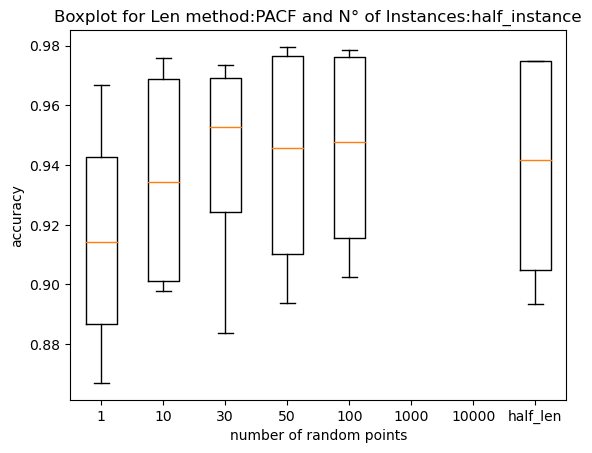

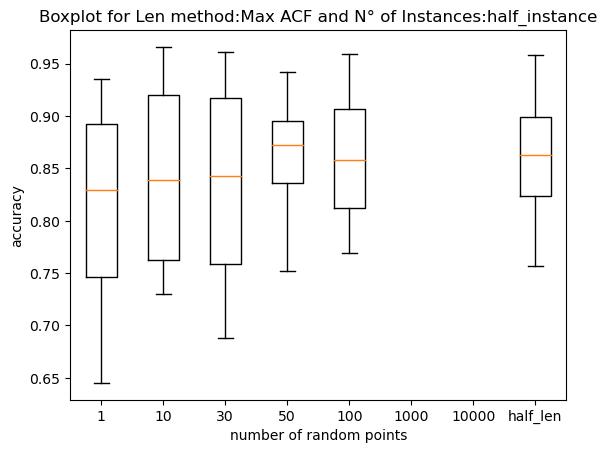

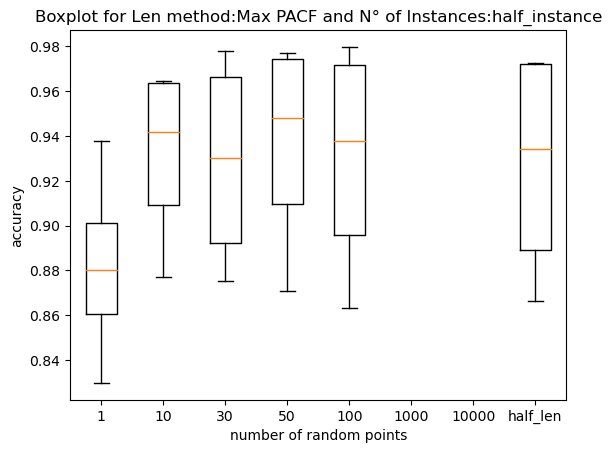

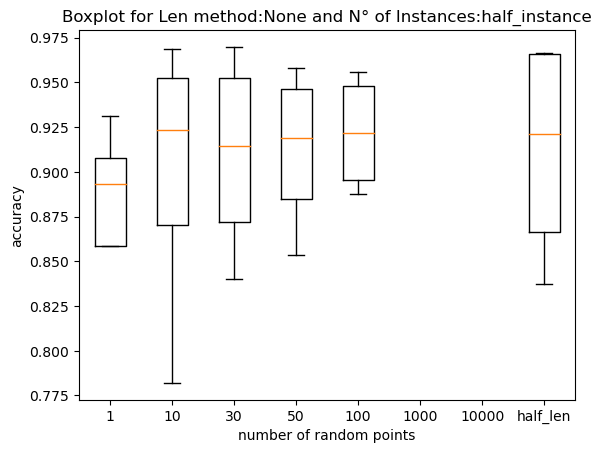

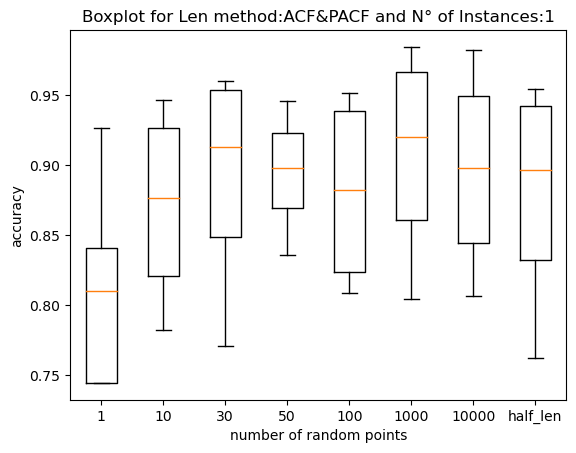

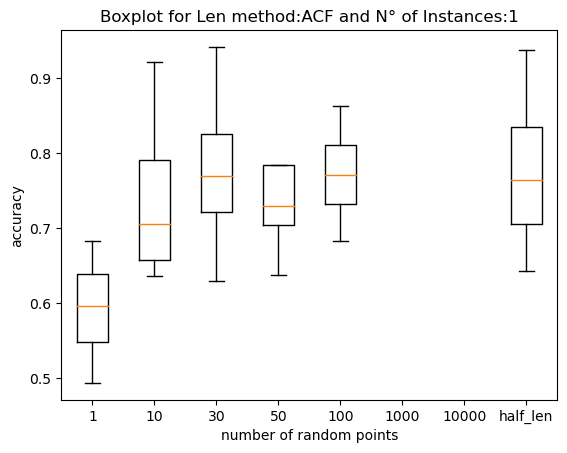

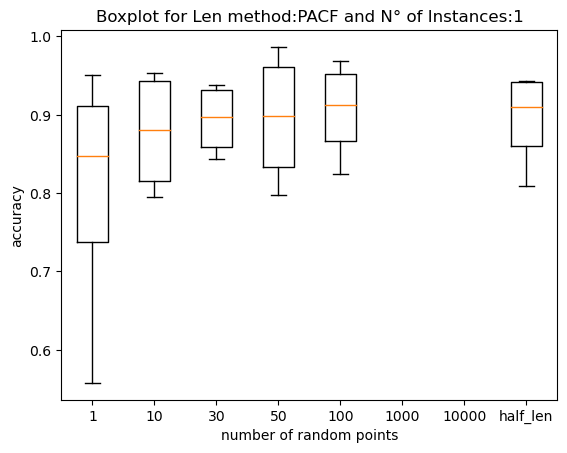

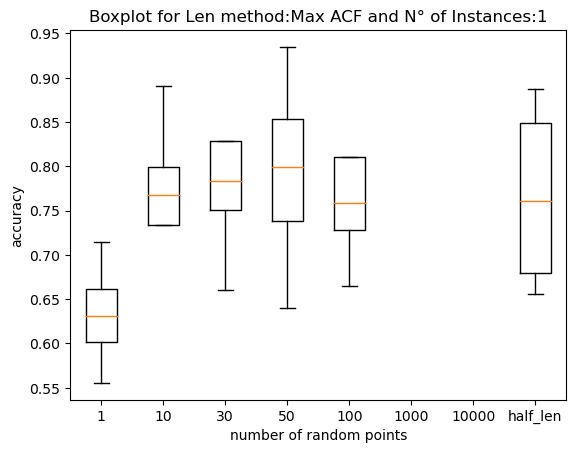

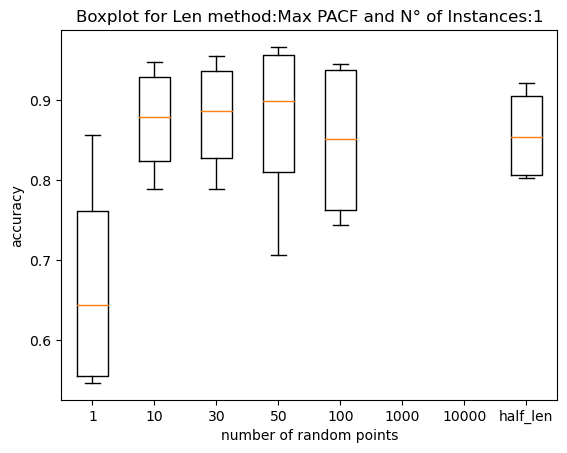

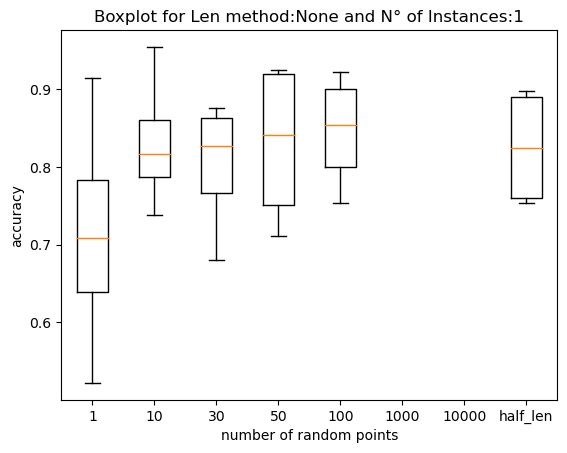

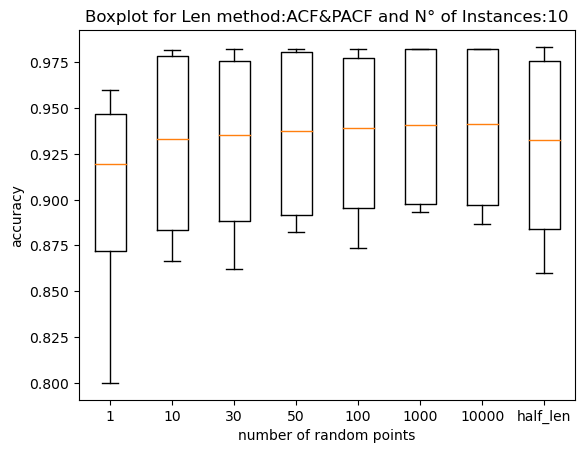

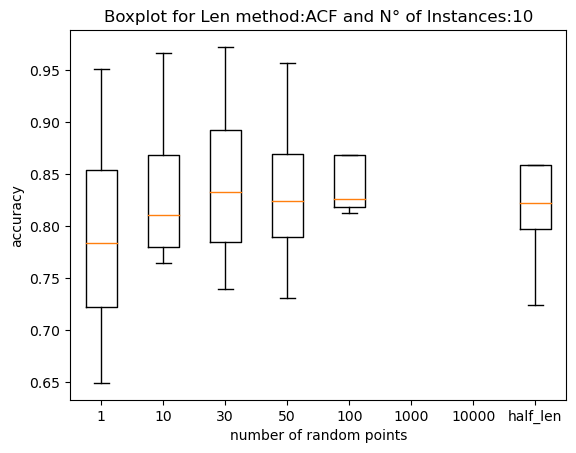

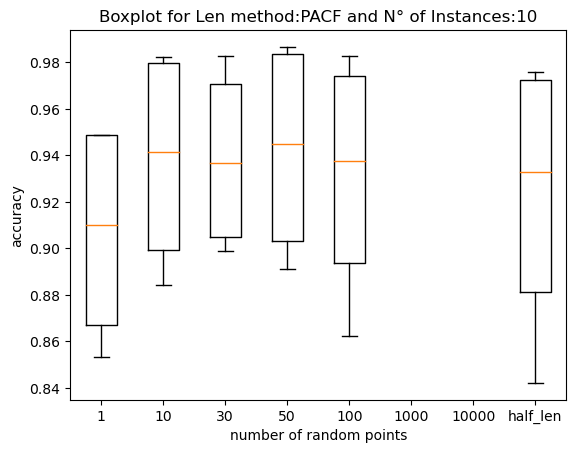

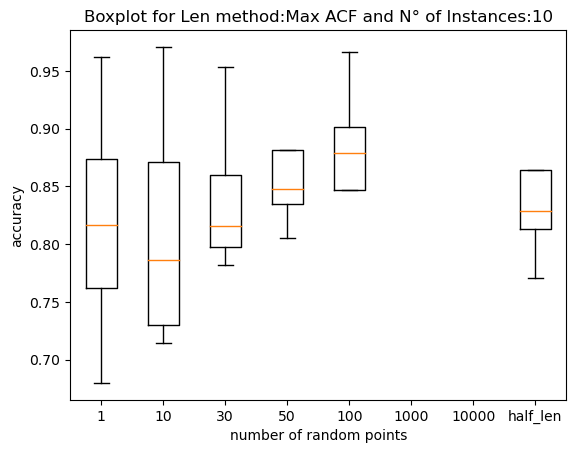

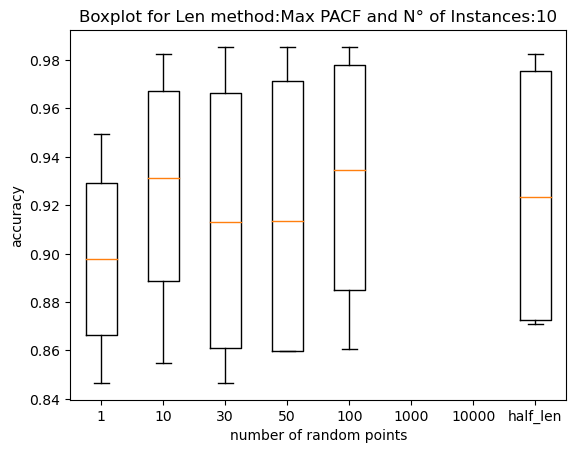

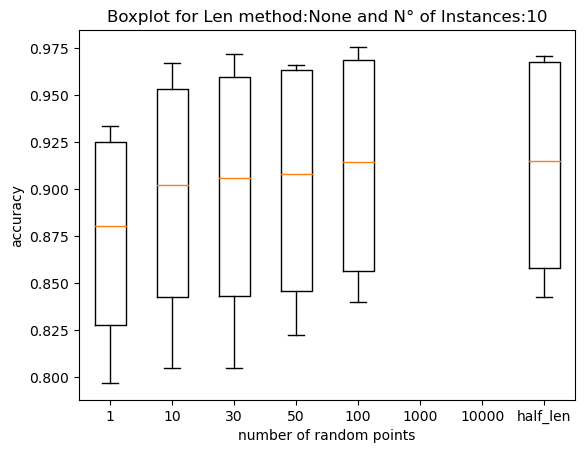

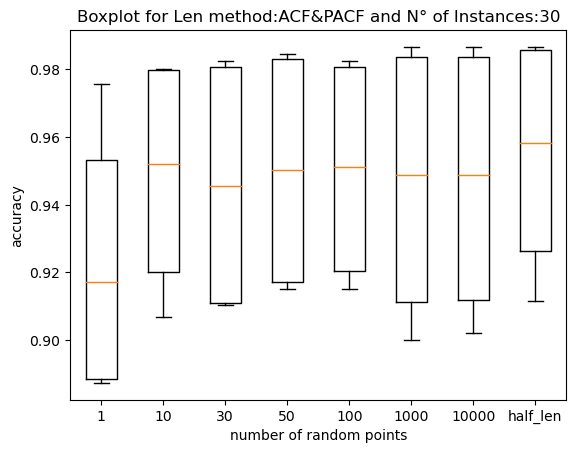

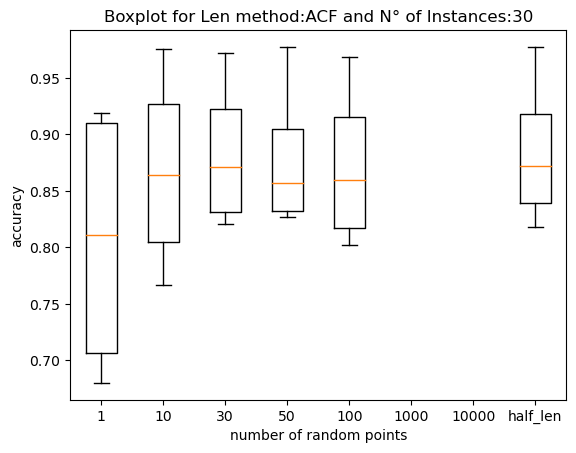

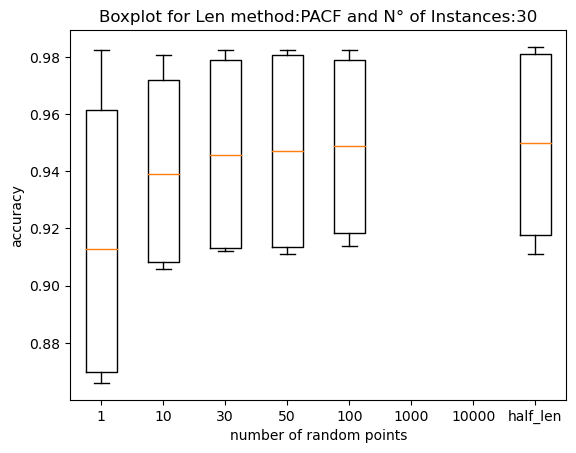

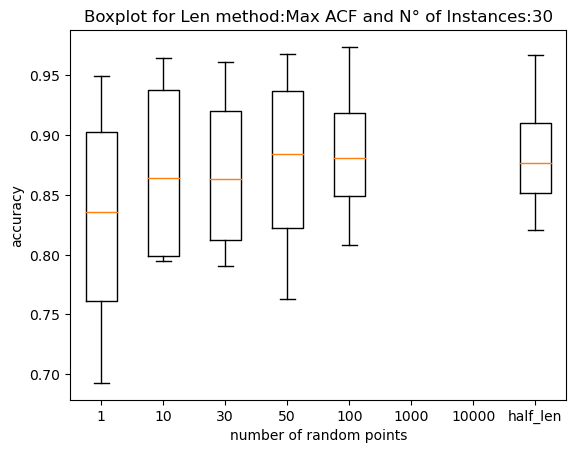

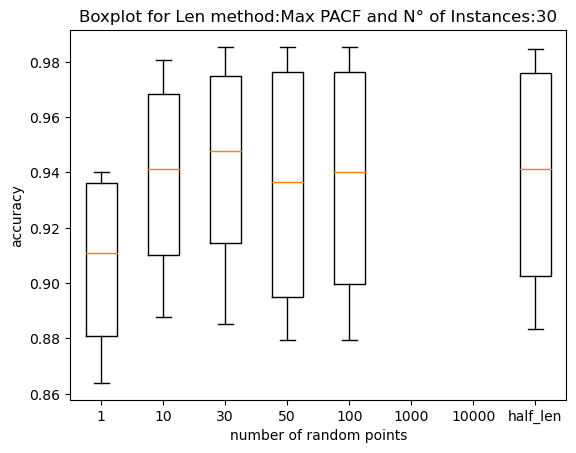

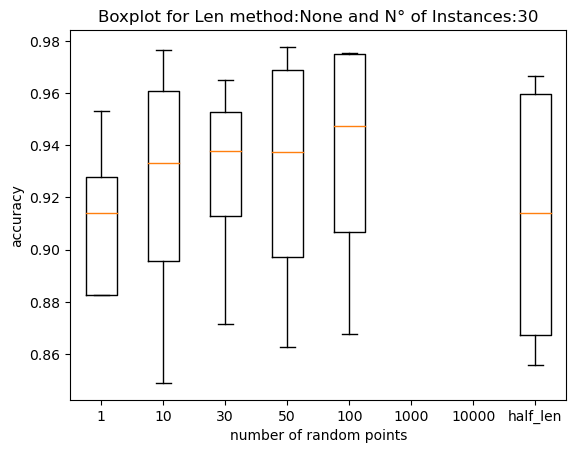

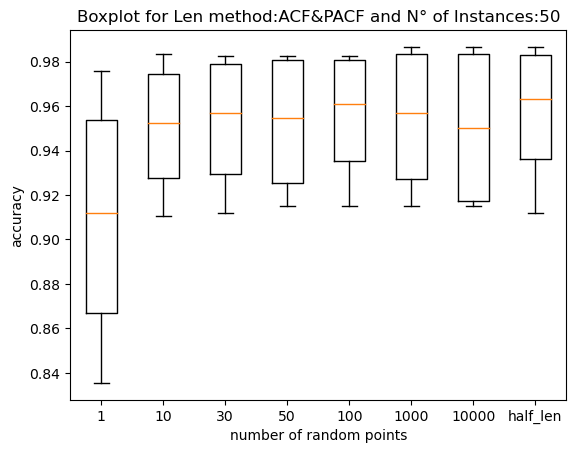

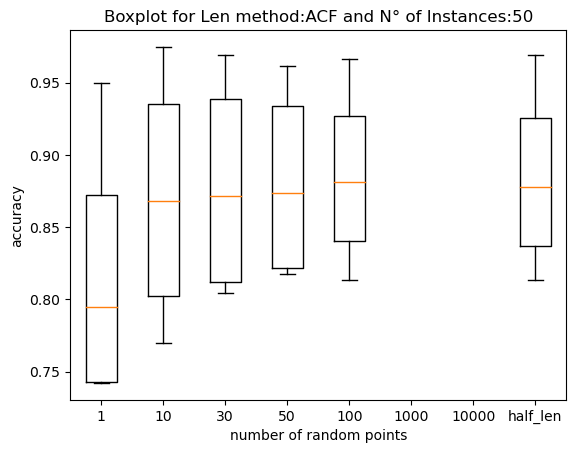

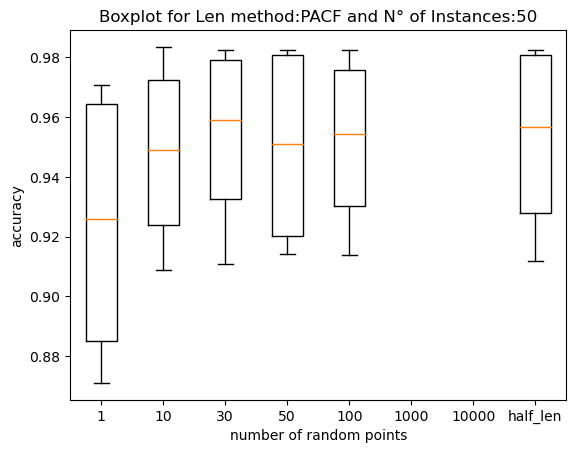

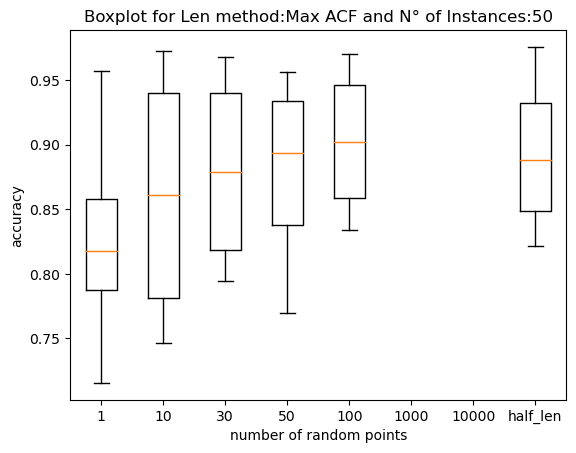

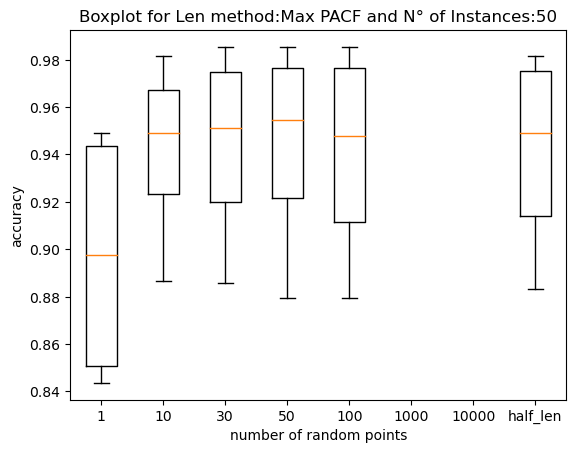

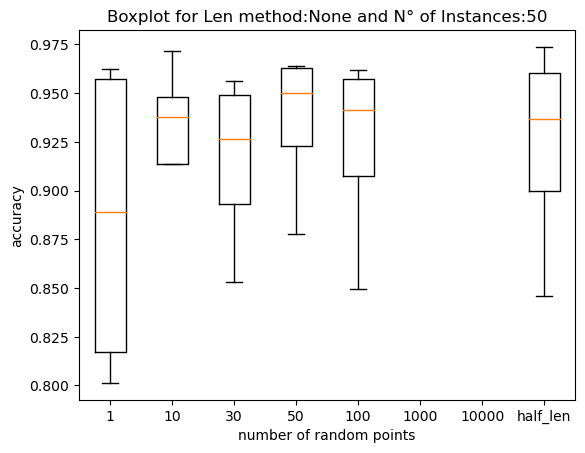

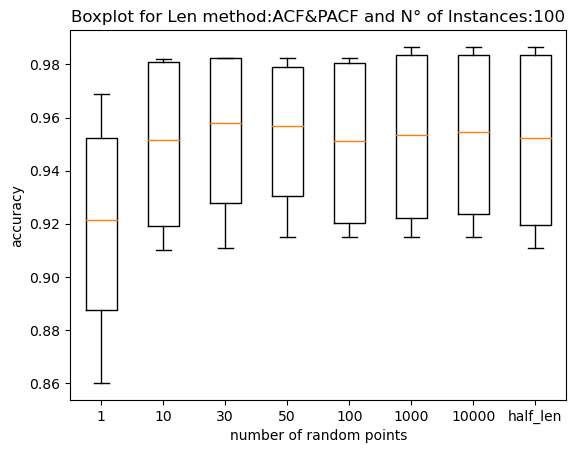

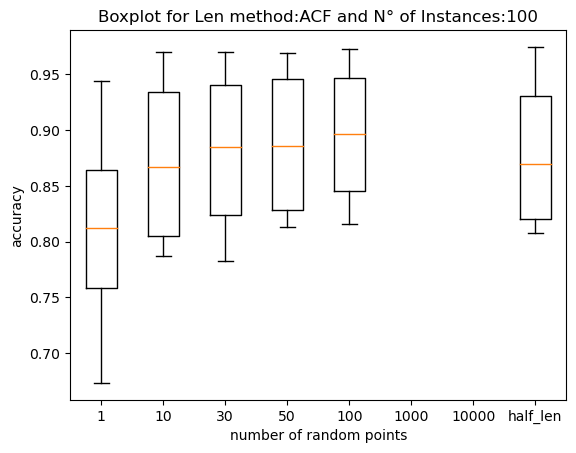

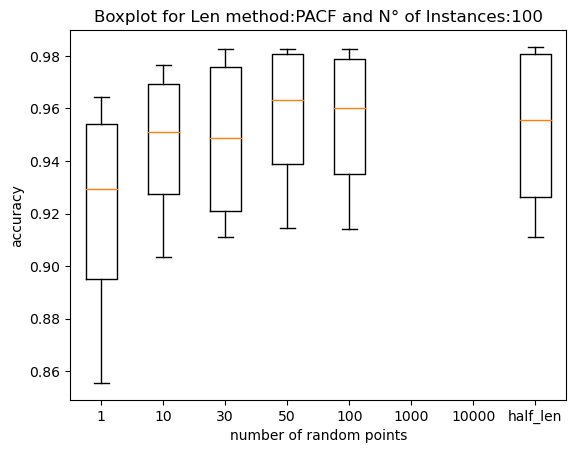

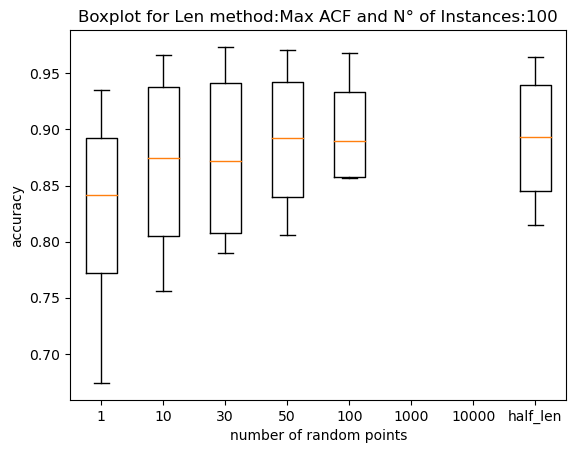

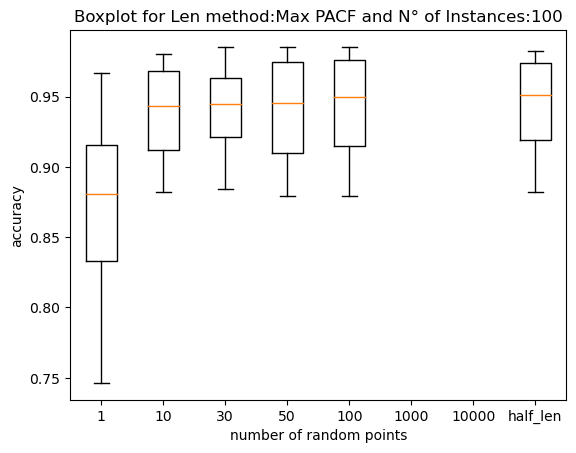

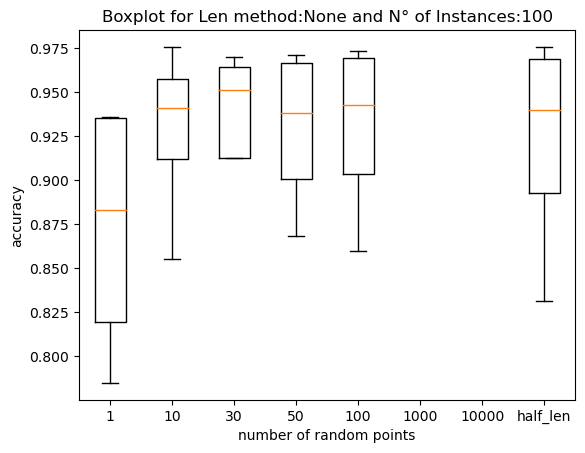

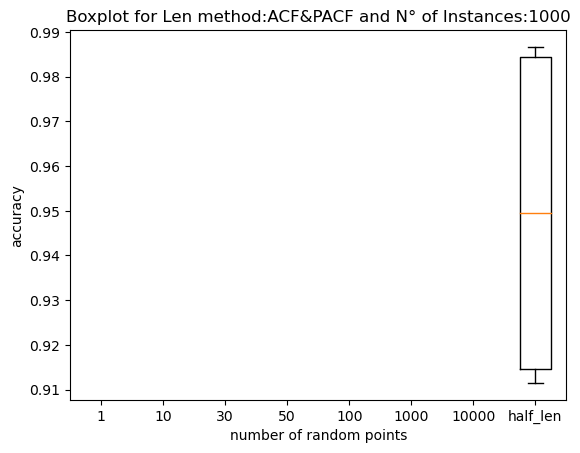

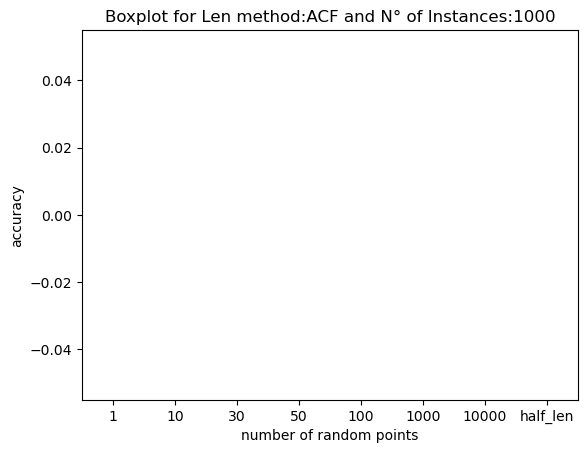

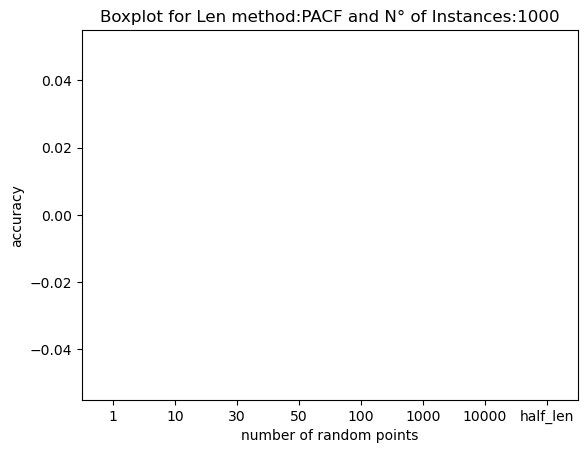

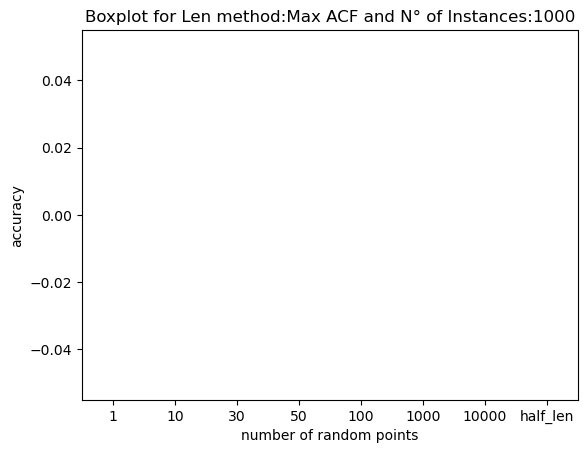

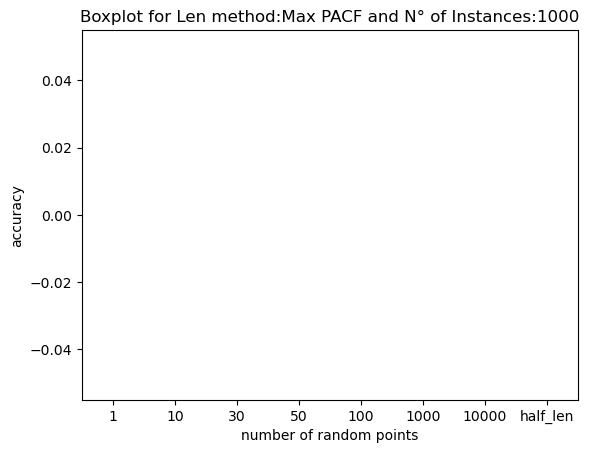

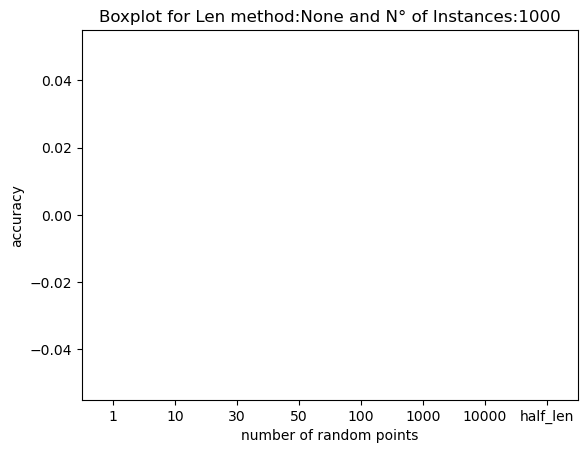

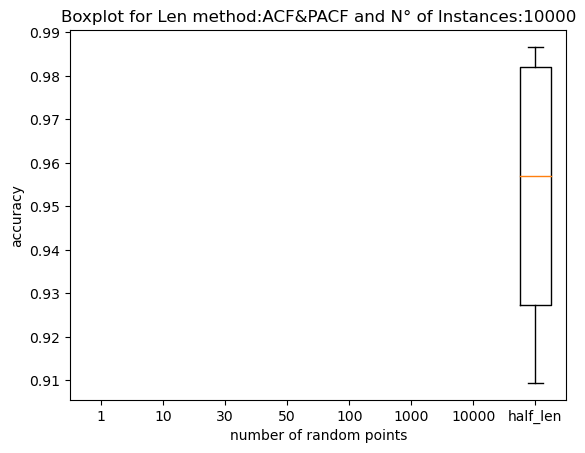

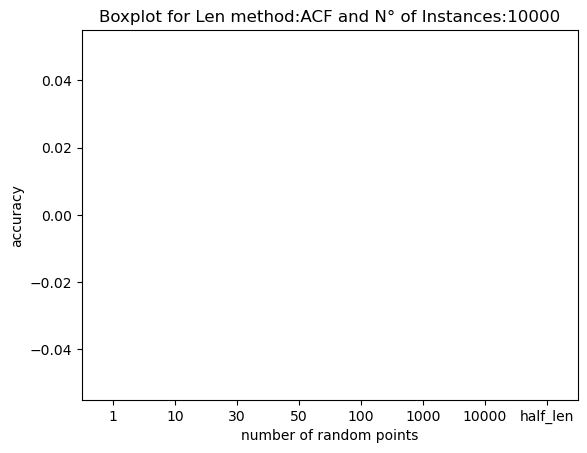

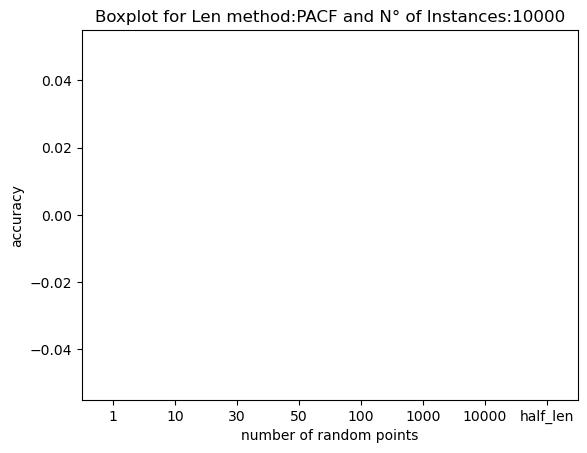

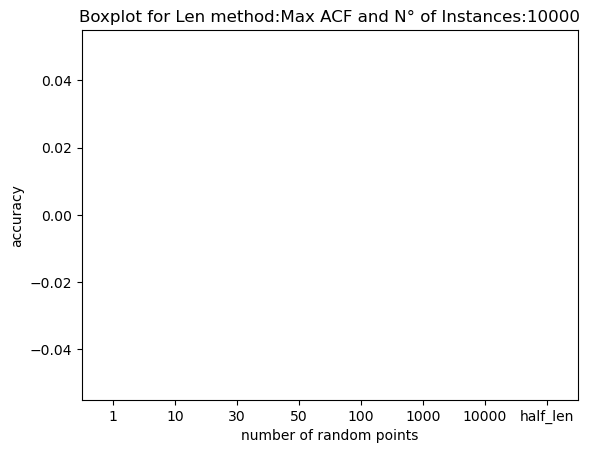

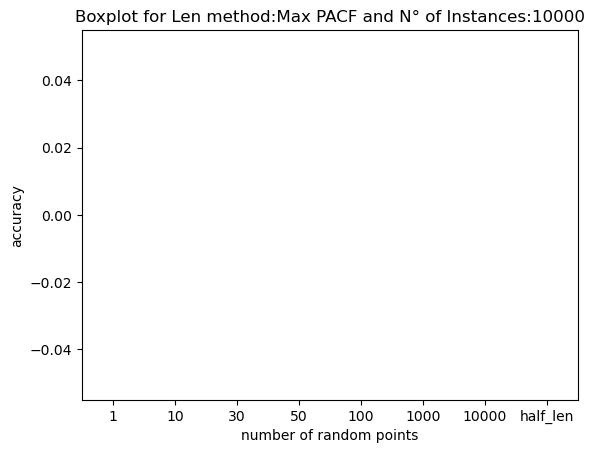

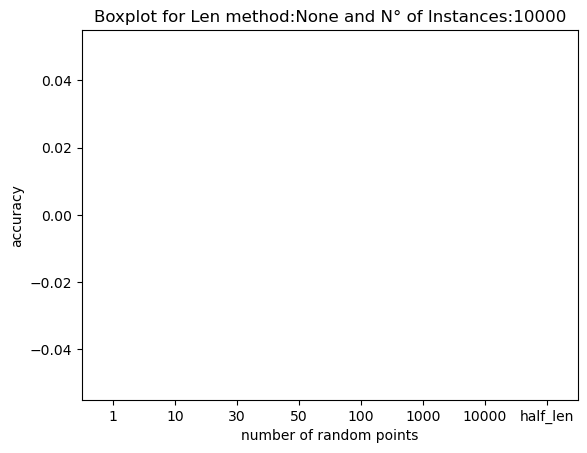

In [22]:
#generate hyperparameter tuning boxplots

df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name','rpoint'], aggfunc='mean')
df_perf=df_perf.reset_index()

for k, ints in enumerate(df_result.nb_per_class.unique()):

    for len_m in df_result.len_method.unique():
        
        
        df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
        df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name'], columns=['rpoint'],values='accuracy')
        df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100", "1000", "10000","half_len"])
        
        #print(df_to_cd.head(5))

        # Plot
        fig, ax = plt.subplots()
        
        
        #order=list(df_to_cd)
        plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)

        # Axis details
        ax.set(xlabel='number of random points', ylabel='accuracy', title='Boxplot for Len method:'+len_m+' and N° of Instances:'+ints)
        #plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
        print(df_to_cd.describe())

        # save plot
        plt.savefig('images_boxplot/boxplot_'+len_m+ints+'.png')




#### Generate CD Diagram Tunning Hyperparameter

In [23]:
from cd_function import *
#generate hyperparameter tuning cd diagrams
for k,ints in enumerate(df_result.nb_per_class.unique()):
   for len_m in df_result.len_method.unique():
      df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
      print('len_method'+str(len_m))
      print('nb_per_class'+str(ints))
      draw_cd_diagram(df_to_cd, labels=True, title=len_m +" comparison, nb_inst_per_class="+str(ints), name_file='images_cd_diagram/cd-diagram_'+len_m+ints+'.png')


len_methodACF&PACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_classhalf_instance
len_methodPACF
nb_per_classhalf_instance


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax ACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax PACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF&PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodPACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class1
len_methodMax PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodNone
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class10


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodPACF
nb_per_class10


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax ACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodNone
nb_per_class10
len_methodACF&PACF
nb_per_class30


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodPACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\Public\random_sast\cd_diagram\cd_function.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width, height))
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal ap

len_methodMax PACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarni

len_methodACF&PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodPACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax ACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodNone
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class100


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected
len_methodPACF
nb_per_class100


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax ACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax PACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodNone
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class1000


ValueError: At least 3 sets of samples must be given for Friedman test, got 1.

In [ ]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

#### Focus on most accurate lenght method

##### Overall Accuracy

In [ ]:
# highest accurate hyperparameters
average_ranks[average_ranks[0]==min_rank][0].index

NameError: name 'average_ranks' is not defined

In [ ]:
# filter by method with ACF&PACF
# create a pivot table with the mean of score by hyperparameter
df_result_acc=df_result[df_result["len_method"]=="ACF&PACF"]
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.939542,0.877555,0.927271,0.953677,0.956126,0.950551,0.948816,0.953708
1,0.914126,0.775572,0.899608,0.924349,0.908810,0.917977,NaN,NaN
10,0.933687,0.870358,0.928688,0.947749,0.949595,0.948779,NaN,NaN
30,0.944359,0.889115,0.928807,0.946019,0.951924,0.952218,NaN,NaN
50,0.937304,0.894267,0.934862,0.949934,0.951600,0.952711,NaN,NaN
100,0.945919,0.880962,0.933627,0.949934,0.954934,0.949934,NaN,NaN
1000,0.940829,0.884683,0.930427,0.937920,0.947254,0.945254,NaN,NaN
10000,0.943605,0.880653,0.930285,0.938587,0.943254,0.945920,NaN,NaN


In [ ]:
# create a pivot table with the variatioon of score by hyperparameter
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='var')
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.001375,0.006626,0.003172,0.001198,0.001009,0.001321,0.001482,0.001244
1,0.001661,0.021651,0.004752,0.001851,0.003790,0.002125,NaN,NaN
10,0.001999,0.005934,0.002996,0.001203,0.000975,0.001192,NaN,NaN
30,0.001299,0.007674,0.002950,0.001496,0.001051,0.001161,NaN,NaN
50,0.001963,0.002222,0.002547,0.001242,0.001005,0.000935,NaN,NaN
100,0.001370,0.005543,0.002485,0.001081,0.000876,0.001153,NaN,NaN
1000,0.001743,0.004922,0.002037,0.001788,0.001162,0.001126,NaN,NaN
10000,0.001595,0.005149,0.002282,0.001549,0.001228,0.001083,NaN,NaN


##### Overall time complexity

In [ ]:
# create a pivot table with the mean of time spent in minutes
pivot=pd.pivot_table(df_result_acc, values=['time','cweights_time','fsubsequence_time','tdataset_time','tclassifier_time'], index=['dataset_name'], aggfunc='mean')/60
pivot = pivot.reindex(columns=['cweights_time','fsubsequence_time','tdataset_time','tclassifier_time','time'])
pivot

,cweights_time,fsubsequence_time,tdataset_time,tclassifier_time,time
dataset_name,,,,,
Chinatown,0.000144,0.000994,0.001531,0.000209,0.002906
GunPoint,0.000639,0.031139,1.402525,0.001113,1.435575
SmoothSubspace,0.000102,0.002209,0.010340,0.002640,0.015324
SonyAIBORobotSurface2,0.000319,0.002637,0.032942,0.000248,0.036185


In [ ]:
# create a pivot table with the mean of time spent in minutes by random points and instances per class
pivot = pd.pivot_table(df_result_acc, values='time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')/60
pivot = pivot.reindex(columns=["half_instance","1","10","30","50","100","1000","10000"], index=["half_len","1","10","30","50","100","1000","10000"])
pivot

nb_per_class,half_instance,1,10,30,50,100,1000,10000
rpoint,,,,,,,,
half_len,0.365060,0.033580,0.289315,0.710070,0.713675,0.729366,0.725937,0.728071
1,0.041609,0.014691,0.014861,0.027817,0.024922,0.025671,NaN,NaN
10,0.056956,0.012027,0.054366,0.122231,0.124822,0.124887,NaN,NaN
30,0.155352,0.019832,0.140973,0.341366,0.343249,0.338935,NaN,NaN
50,0.246738,0.029340,0.227873,0.554460,0.558782,0.559568,NaN,NaN
100,0.451091,0.039133,0.428514,1.041315,1.045938,1.042353,NaN,NaN
1000,0.595801,0.026801,0.184448,0.433707,0.432775,0.432414,NaN,NaN
10000,0.563021,0.019574,0.177844,0.465054,0.488714,0.456792,NaN,NaN


##### Calculate weights time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='cweights_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,1000,10000,30,50,half_instance
rpoint,,,,,,,,
1,0.017604,0.020007,0.018430,NaN,NaN,0.020262,0.021097,0.029543
10,0.019363,0.018987,0.014016,NaN,NaN,0.014815,0.020272,0.017201
100,0.017604,0.013419,0.018166,NaN,NaN,0.014739,0.019486,0.018154
1000,0.014287,0.013114,0.012154,NaN,NaN,0.011344,0.016621,0.019891
10000,0.013022,0.013982,0.012907,NaN,NaN,0.012067,0.013814,0.016851
30,0.021165,0.016102,0.017665,NaN,NaN,0.016200,0.017681,0.020399
50,0.015121,0.017775,0.018636,NaN,NaN,0.012195,0.019424,0.018907
half_len,0.020171,0.023636,0.014964,0.016867,0.016596,0.021947,0.017721,0.017411


##### Finding subsequences time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='fsubsequence_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Transform Dataset time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tdataset_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

##### Classifier time complexity

In [ ]:
pd.pivot_table(df_result_acc, values='tclassifier_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')